In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Importando archivo con funciones extra
%run ".\\funciones_auxiliares\\graficarVectores.ipynb"
%run ".\\funciones_auxiliares\\graficarMatriz.ipynb"

In [5]:
plt.style.use('classic')

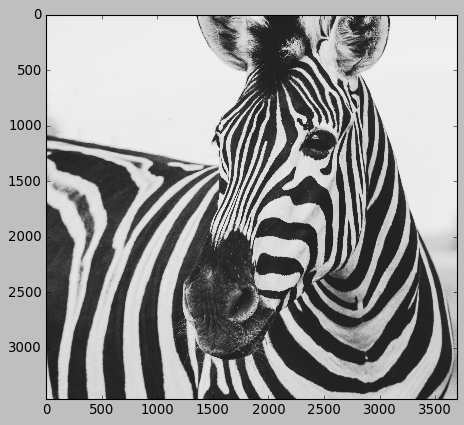

In [6]:
imagen = Image.open(".\\imagenes\\imagen_ejemplo_frida_bredesen.jpg")

plt.imshow(imagen)

In [11]:
# Convierte la imagen RGB a escala de grises, pero entrega una imagen con 2 canales(o bandas) L y A

"""
L tiene la información de la imagen en escala de grises.

A tiene la información de transparencia de la imagen, 
como estamos trabajando con una imagen JPG todos los valores en esta matriz son 255.
"""


imagen_gr = imagen.convert('LA')
print(imagen_gr)

<PIL.Image.Image image mode=LA size=3693x3456 at 0x71C30C4208>


In [10]:
imagen_matriz = np.array(list(imagen_gr.getdata(band=0)), float)
imagen_matriz

array([236., 236., 235., ..., 195., 195., 193.])

In [13]:
# Ajustando el tamaño de la matriz
imagen_matriz.shape = (imagen_gr.size[1], imagen_gr.size[0])
imagen_matriz

array([[236., 236., 235., ..., 239., 239., 239.],
       [236., 236., 235., ..., 239., 239., 239.],
       [236., 236., 235., ..., 238., 238., 238.],
       ...,
       [217., 216., 216., ..., 197., 196., 194.],
       [216., 216., 216., ..., 196., 195., 193.],
       [216., 216., 216., ..., 195., 195., 193.]])

In [14]:
imagen_matriz.shape
# (3456, 3693) pixeles

(3456, 3693)

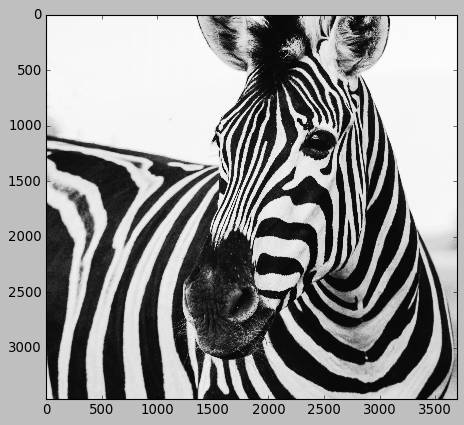

In [20]:
plt.imshow(imagen_matriz, cmap='gray')
# Grafica la matriz en escala de grises
# Se pueden alterar los valores de la matriz y alterara el color de la imagen

## Descomposicion de la matriz imagen con SVD

In [21]:
U, D, V = np.linalg.svd(imagen_matriz)

In [22]:
print('Imagen original', imagen_matriz.shape)
print('U', U.shape)
print('D', D.shape)
print('V', V.shape)

Imagen original (3456, 3693)
U (3456, 3456)
D (3456,)
V (3693, 3693)


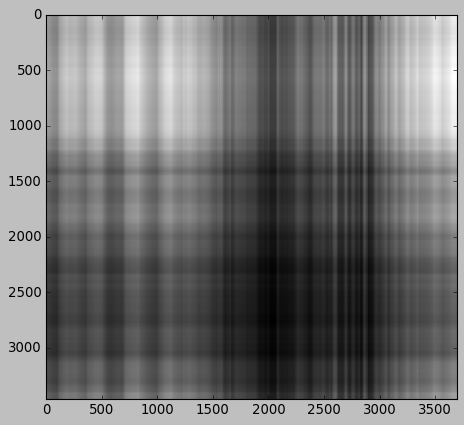

In [23]:
# Reconstruyendo la matriz y graficandola
imagen_recons = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1,:])
plt.imshow(imagen_recons, cmap='gray')

### Alterando la cantidad de posiciones a usar, para llegar a una mejor compresion de la imagen

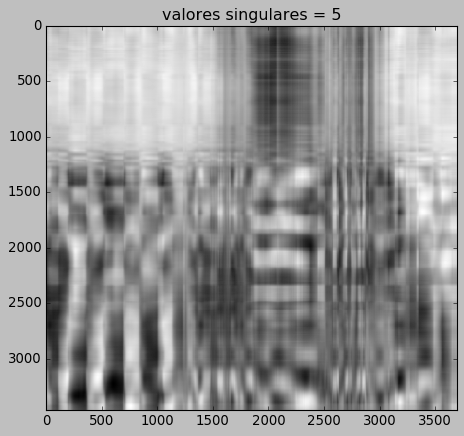

In [26]:
i = 5
imagen_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

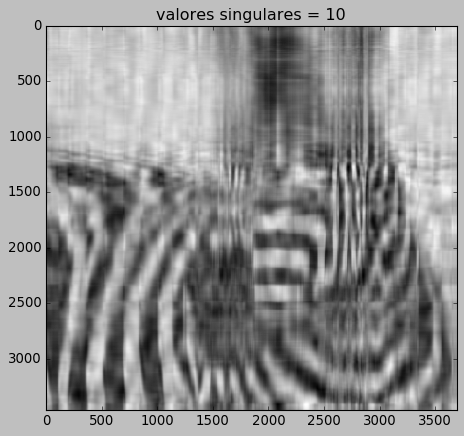

In [27]:
i = 10
imagen_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()

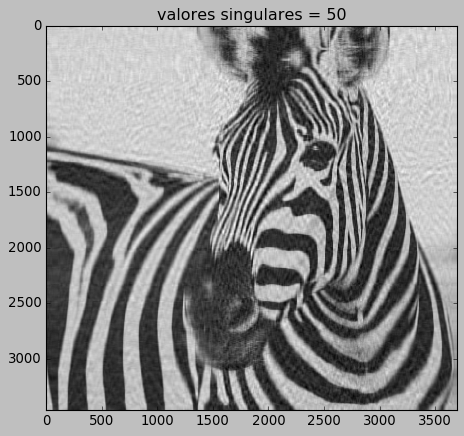

In [29]:
# Usando 50 valores singulares
# Dependera con que fin se requiere la descomposicion de la imagen
# Se concluye que la imagen venia con 3650 valores singulares, y se pudo comprobar que con solo 50 se puede identificar 
# que es la figura 
i = 50
imagen_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i,:])
plt.imshow(imagen_recons, cmap='gray')

titulo = "valores singulares = %s" % i

plt.title(titulo)
plt.show()